In [1]:
!python -m pip install natasha
from tqdm import tqdm
from natasha import Segmenter, MorphVocab, NewsEmbedding, NewsMorphTagger, NewsSyntaxParser, NewsNERTagger, PER, NamesExtractor, DatesExtractor, MoneyExtractor, AddrExtractor, Doc
import re

In [2]:
segmenter = Segmenter()
morph_vocab = MorphVocab()

emb = NewsEmbedding()
morph_tagger = NewsMorphTagger(emb)
ner_tagger = NewsNERTagger(emb)

names_extractor = NamesExtractor(morph_vocab)

In [3]:
def string_and_doc(item):
    item = str(item)
    item = item.split('\n')
    item = list(filter(None, item))
    string = str()
    for each in item[5:]:
        string = string + each + ' '
    doc = Doc(string)
    doc.segment(segmenter)
    doc.tag_morph(morph_tagger)
    doc.tag_ner(ner_tagger)
    return(doc.spans)

In [4]:
def normalizing(docspans):
    for s in docspans:
        s.normalize(morph_vocab)
    return [(s.normal, s.type) for s in docspans]

In [5]:
def another(massives):
    no_repeat = set()
    for one in massives:
        if one[1] == 'ORG' or one[1] == 'PER':
            one = one[0]
            no_repeat.add(one)
    no_repeat_list = list(no_repeat)
    for elem in no_repeat_list:
        names[elem] = names.get(elem, 0) + 1
        pers = connect.get(elem, {})
        for same_elem in no_repeat_list:
            if elem != same_elem:
                pers[same_elem] = pers.get(same_elem, 0) + 1
        connect[elem] = pers

In [6]:
%matplotlib notebook
import matplotlib.pyplot as plt
import networkx as nx
import math
import numpy as np

In [7]:
def formASocialGraph(persons):
    G=nx.Graph()
    for n in persons.keys():
        for n2 in persons[n].keys():
            G.add_edge(n, n2)
    return G

Специально для защиты

Вершины с самыми большими мерами кластерности:
Владимир Владимиров
СК
Instagram
Дума
СМИ
МВД
СКР
Владимир Путин
ООО
Общественная палата


<IPython.core.display.Javascript object>


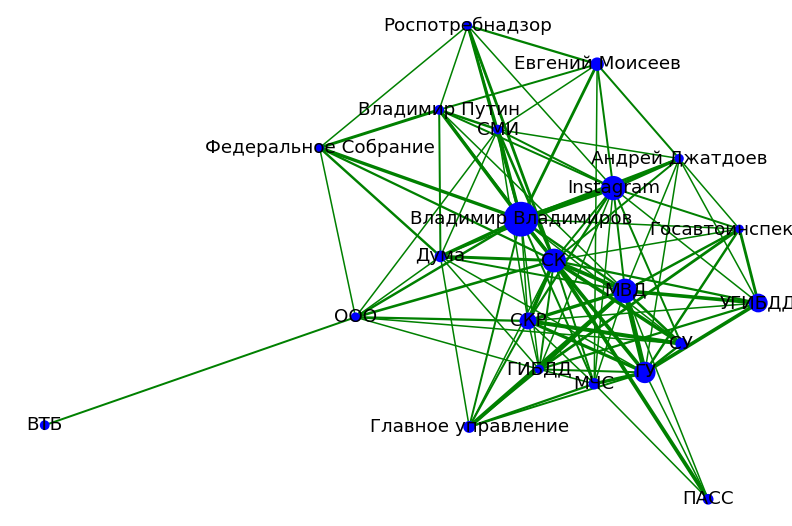

In [14]:
names = {}
connect = {}
with open('testing.txt', 'r', encoding = 'utf-8') as file:
    text = file.read()
    text = text.split('=====')
    text = list(filter(None, text))
    count = 0
    for item in text:
        count += 1
        another(normalizing(string_and_doc(item)))
        if count % 10000 == 0:
            print(count)
pers2={n:{n2:connect[n][n2] for n2 in connect[n].keys() if names[n2]>20 and n2!=')'}
           for n in connect.keys() if names[n]>20 and n!=')'}
test = copy.deepcopy(connect)
real_connects = dict()
print('Вершины с самыми большими мерами кластерности:')
for i in range(10):
    max_len = 0
    for item in test:
        if len(test[item]) >= max_len:
            max_len = len(test[item])
            element = item
            max_len_val = test[item]
    real_connects[element] = max_len_val
    test.pop(element, None)
    print(element)
drawASocialGraph(formASocialGraph(pers2), pers2, names)

In [107]:
names = {}
connect = {}
with open('laba.txt', 'r', encoding = 'utf-8') as file:
    text = file.read()
    text = text.split('=====')
    text = list(filter(None, text))
    count = 0
    for item in text:
        count += 1
        another(normalizing(string_and_doc(item)))
        if count % 10000 == 0:
            print(count)

10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000


In [8]:
import copy

In [9]:
def drawASocialGraph(G, persons, freqs, colors='b', layout='spring'):
    if layout=='kawai':
        pstn=nx.kamada_kawai_layout(G)
    elif layout=='circle':
        pstn=nx.drawing.layout.circular_layout(G2)
    elif layout=='random':
        pstn=nx.drawing.layout.random_layout(G2)
    else:
        pstn=nx.spring_layout(G)
    sz=[freqs[n] for n in G.nodes]
    lw=[math.log(persons[e[0]][e[1]], 10)+1 for e in G.edges]
    nx.draw(G, pos=pstn, node_color=colors, edge_color='g', with_labels=True, node_size=sz, width=lw)

Вершины с самыми большими мерами кластерности:
Владимир
Северо-Кавказский федеральный университет
ФСБ
Сергей
ПСК
Интернет
ОАО
Александр
КМВ
Госдума


<IPython.core.display.Javascript object>


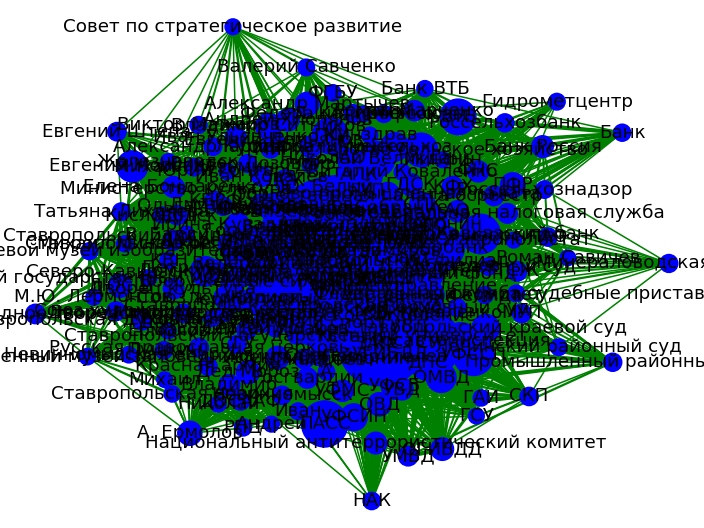

In [116]:
pers2={n:{n2:connect[n][n2] for n2 in connect[n].keys() if names[n2]>100 and n2!=')'}
           for n in connect.keys() if names[n]>100 and n!=')'}
test = copy.deepcopy(connect)
real_connects = dict()
print('Вершины с самыми большими мерами кластерности:')
for i in range(10):
    max_len = 0
    for item in test:
        if len(test[item]) >= max_len:
            max_len = len(test[item])
            element = item
            max_len_val = test[item]
    real_connects[element] = max_len_val
    test.pop(element, None)
    print(element)
drawASocialGraph(formASocialGraph(pers2), pers2, names)